In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl  

In [2]:
#设置字体
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
#读取csv文件
data=pd.read_csv("./data.csv")
#输出前5条数据
print(data.head())
#将shot_made_flag为空的数据清除
new_data = data[data['shot_made_flag'].notnull()]

         action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period   ...          shot_type  \
0    167     72 -118.1028                 10       1   ...     2PT Field Goal   
1   -157      0 -118.4268                 10       1   ...     2PT Field Goal   
2   -101    135 -118.3708                  7       1   ...     2PT Field Goal   
3    138    175 -118.1318                  6       1   ...     2PT Field Goal   
4      0      0 -118.2698                  6       2   ...     2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zo

#### 一共25个特征数据
action_type 进攻方式（更具体）  
combined_shot_type 进攻方式  
game_event_id 比赛时间id  
game_id 比赛ID  
lat 投篮点  
loc_x 投篮点  
loc_y 投篮点  
lon 投篮点  
minutes_remaining 单节剩余时间（分钟）  
period 表示第几节  
playoffs 是否是季后赛  
season 赛季  
seconds_remaining 剩余时间（秒）  
shot_distance 投篮距离  
shot_made_flag 是否进球  
shot_type 两分球或三分球  
shot_zone_area 投篮区域  
shot_zone_basic 投篮区域（更具体）  
shot_zone_range 投篮范围  
team_id 球队ID  
team_name 球队名称  
game_date 比赛日期  
matchup 比赛双方  
opponent 对手  
shot_id 投篮ID  

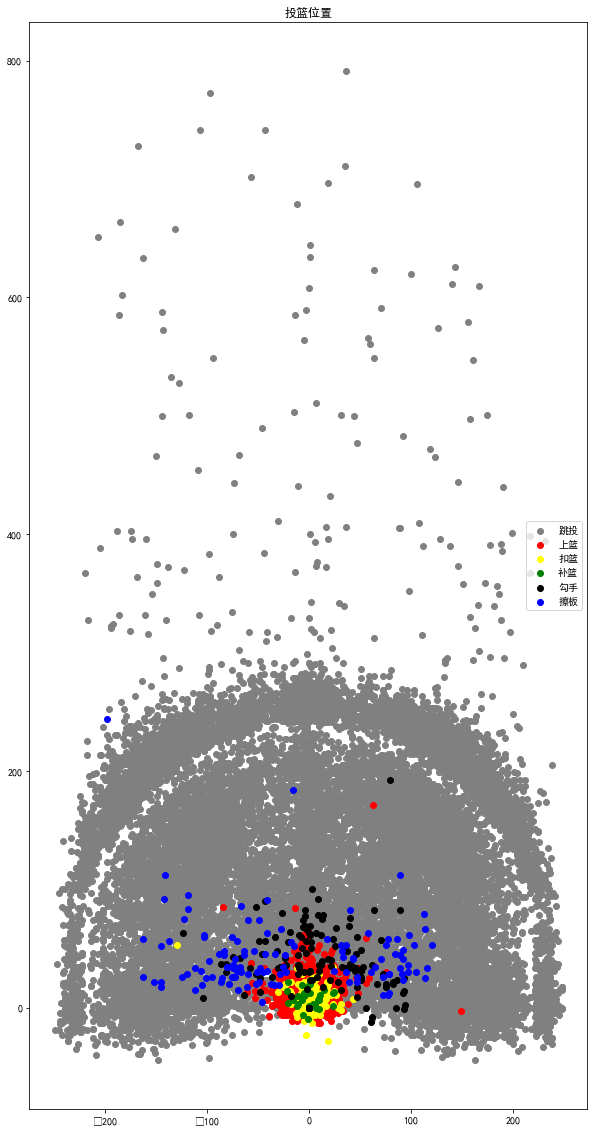

In [9]:
# 先来看一看科比的投篮位置
plt.figure(figsize=(10,20))
jumpshot = new_data[new_data['combined_shot_type']=='Jump Shot']
layup = new_data[new_data['combined_shot_type']=='Layup']
dunk = new_data[new_data['combined_shot_type']=='Dunk']
tipshot = new_data[new_data['combined_shot_type']=='Tip Shot']
hookshot = new_data[new_data['combined_shot_type']=='Hook Shot']
bankshot = new_data[new_data['combined_shot_type']=='Bank Shot']
# 各个不同的投篮点标注
plt.scatter(jumpshot.loc_x, jumpshot.loc_y, color='grey')
plt.scatter(layup.loc_x, layup.loc_y, color='red')
plt.scatter(dunk.loc_x, dunk.loc_y, color='yellow' )
plt.scatter(tipshot.loc_x, tipshot.loc_y, color='green')
plt.scatter(hookshot.loc_x, hookshot.loc_y, color='black')
plt.scatter(bankshot.loc_x, bankshot.loc_y, color='blue')
label=['跳投','上篮','扣篮','补篮','勾手','擦板']
plt.legend(label,loc=7)
plt.title('投篮位置')
plt.show()

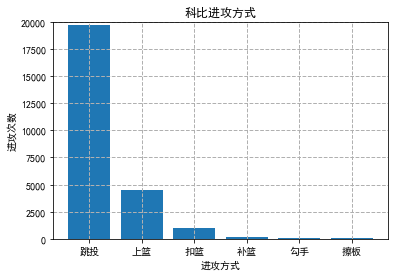

In [10]:
# 再来看看科比的出手方式的次数，很明显跳投最多
attack_method = new_data['combined_shot_type'].value_counts()
a = np.array([1,2,3,4,5,6])
plt.bar(a,attack_method,align = 'center')
plt.xlabel('进攻方式')
plt.ylabel('进攻次数')
plt.title('科比进攻方式')
plt.grid(linestyle = '--',linewidth = 1)
plt.ylim(0,20000)
plt.xticks(a,('跳投','上篮','扣篮','补篮','勾手','擦板'))
plt.show()

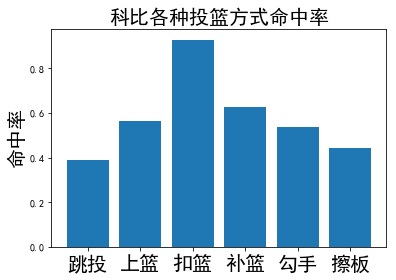

In [11]:
# 投篮命中率上，扣篮无疑是命中率最高的
shooting = new_data[new_data['shot_made_flag']==1]['combined_shot_type'].value_counts()
list1 = attack_method.tolist()
list2 = shooting.tolist()
list3 = attack_method.tolist()
for i in range(len(list1)):
    list3[i]=list2[i]/list1[i]
hits_df=pd.Series(list3);
a = np.array([1,2,3,4,5,6])
plt.bar(a,hits_df,align = 'center')
plt.ylabel('命中率',fontsize=20)
plt.title('科比各种投篮方式命中率',fontsize=20)
plt.xticks(a,('跳投','上篮','扣篮','补篮','勾手','擦板'),fontsize=20)
plt.show()

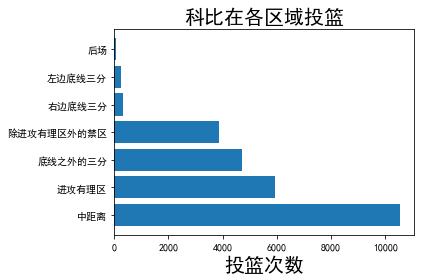

In [12]:
# 从投篮距离上看，科比大多数是在中距离出手
area = new_data['shot_zone_basic'].value_counts()
b = np.array([0,1,2,3,4,5,6])
plt.barh(b,area,align ='center')
plt.yticks(b,('中距离','进攻有理区','底线之外的三分','除进攻有理区外的禁区','右边底线三分','左边底线三分','后场'))
plt.xlabel('投篮次数',fontsize=20)
plt.title('科比在各区域投篮',fontsize=20)
plt.tight_layout()# 紧凑显示图片，居中显示
plt.show()

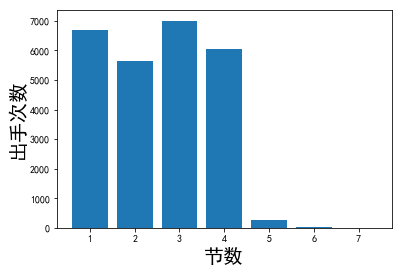

In [13]:
# 科比在每一节的出手次数，其中第三节最多，第一节次之，因为5,6,7节都是加时赛，自然少很多
shot_number = new_data['period'].value_counts().sort_index()
shot_hit = new_data[new_data['shot_made_flag']==1]['period'].value_counts().sort_index()
plt.bar(shot_number.index,shot_number,align='center')
plt.ylabel('出手次数',fontsize=20)
plt.xlabel('节数',fontsize=20)
plt.show()

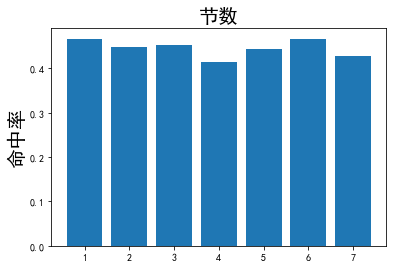

In [14]:
# 每一节投篮命中率 可以看出科比的投篮命中率在第四节最低，可以见得体力对科比投篮命中率也是有些影响的(5,6,7表示加时)
list1 = shot_number.tolist()
list2 = shot_hit.tolist()
for i in range(len(list1)):
    list2[i]=list2[i]/list1[i]
shot_hit=pd.Series(list2)
c = np.array([1,2,3,4,5,6,7])
plt.bar(c,shot_hit,align = 'center')
plt.ylabel('命中率',fontsize=20)
plt.title('节数',fontsize=20)
plt.xticks(c)
plt.show()

0.0为投丢 1.0为投中


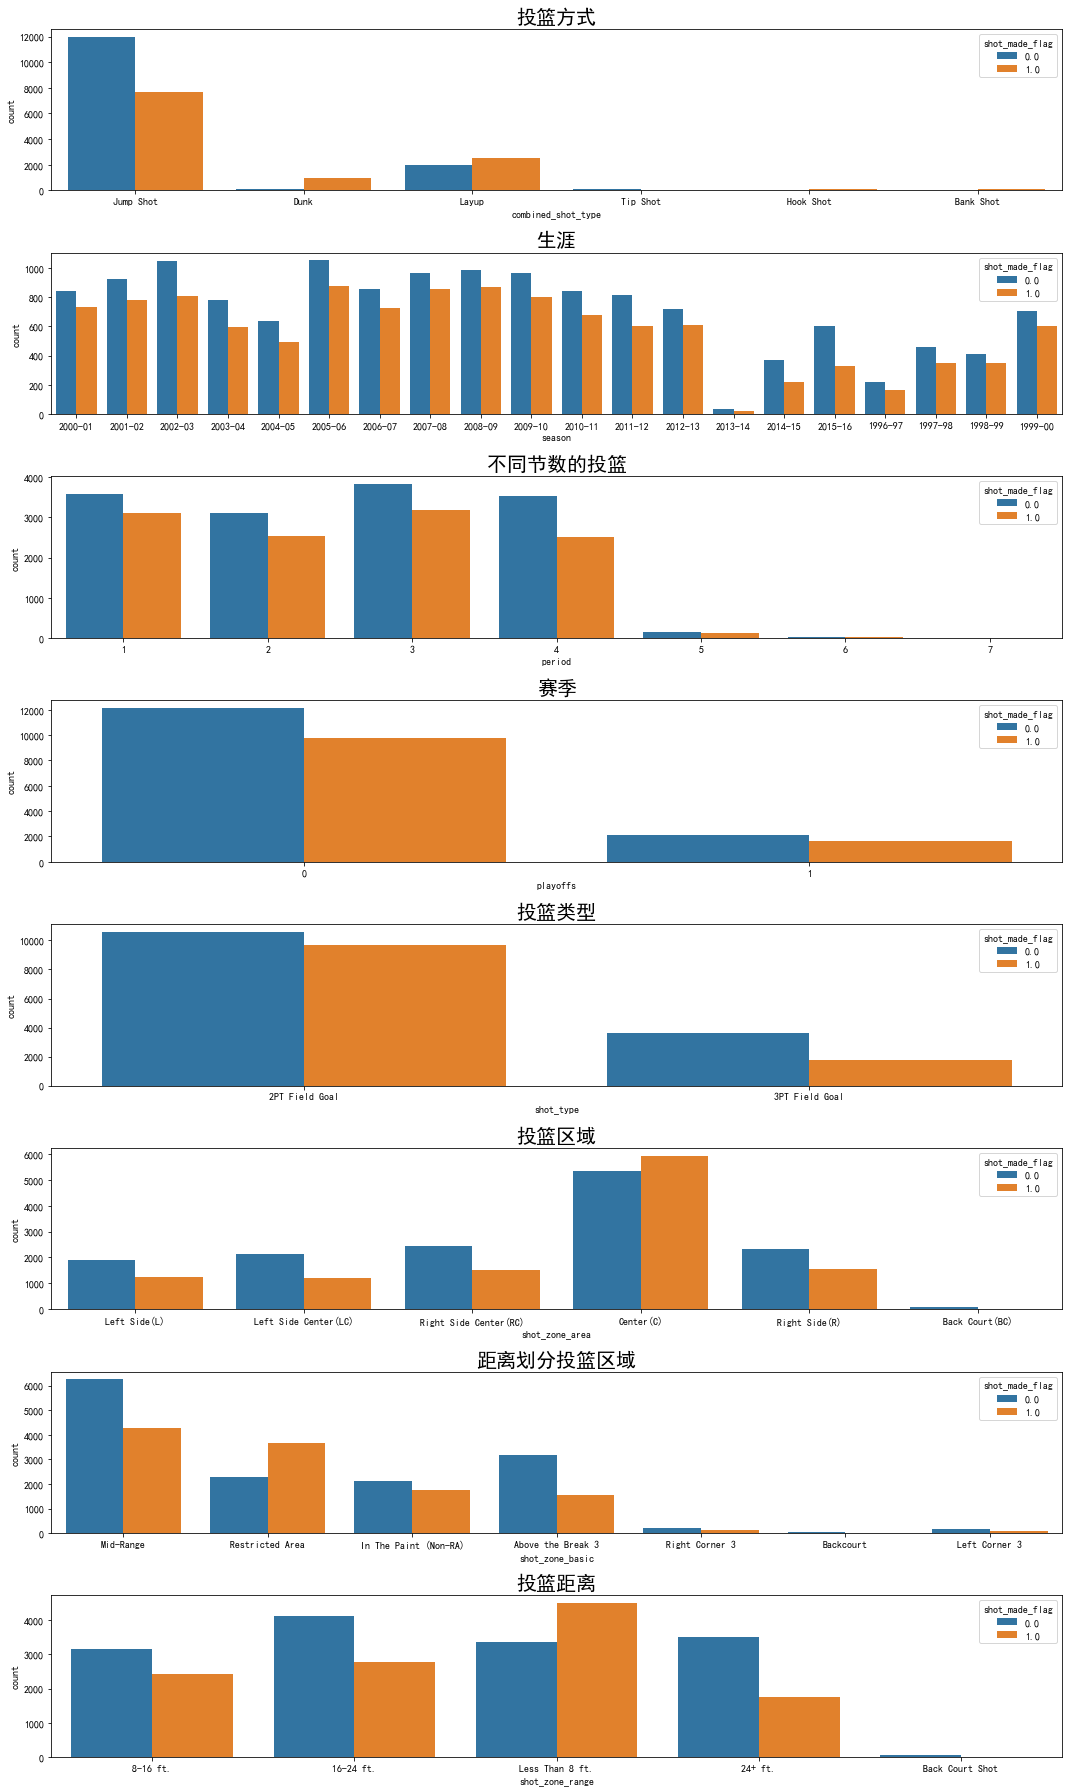

In [17]:
# 科比在13-14赛季仅出场6次，从下图可以清楚的看到
f, axarr = plt.subplots(8, figsize=(15, 25))
print("0.0为投丢 1.0为投中")
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=new_data, ax=axarr[0])
sns.countplot(x="season", hue="shot_made_flag", data=new_data, ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=new_data, ax=axarr[2])
sns.countplot(x="playoffs", hue="shot_made_flag", data=new_data, ax=axarr[3])
sns.countplot(x="shot_type", hue="shot_made_flag", data=new_data, ax=axarr[4])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=new_data, ax=axarr[5])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=new_data, ax=axarr[6])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=new_data, ax=axarr[7])

axarr[0].set_title('投篮方式',fontsize=20)
axarr[1].set_title('生涯',fontsize=20)
axarr[2].set_title('不同节数的投篮',fontsize=20)
axarr[3].set_title('赛季',fontsize=20)
axarr[4].set_title('投篮类型',fontsize=20)
axarr[5].set_title('投篮区域',fontsize=20)
axarr[6].set_title('距离划分投篮区域',fontsize=20)
axarr[7].set_title('投篮距离',fontsize=20)

plt.tight_layout()
plt.show()

### 参考
http://www.cnblogs.com/lq0310/p/9345936.html